In [22]:
import os

for dirname, _, filenames in os.walk('Dataset5'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset5\Jahe\Jahe (1).jpg
Dataset5\Jahe\Jahe (10).jpg
Dataset5\Jahe\Jahe (100).jpg
Dataset5\Jahe\Jahe (101).jpg
Dataset5\Jahe\Jahe (102).jpg
Dataset5\Jahe\Jahe (103).jpg
Dataset5\Jahe\Jahe (104).jpg
Dataset5\Jahe\Jahe (105).jpg
Dataset5\Jahe\Jahe (106).jpg
Dataset5\Jahe\Jahe (107).jpg
Dataset5\Jahe\Jahe (108).jpg
Dataset5\Jahe\Jahe (109).jpg
Dataset5\Jahe\Jahe (11).jpg
Dataset5\Jahe\Jahe (110).jpg
Dataset5\Jahe\Jahe (111).jpg
Dataset5\Jahe\Jahe (112).jpg
Dataset5\Jahe\Jahe (113).jpg
Dataset5\Jahe\Jahe (114).jpg
Dataset5\Jahe\Jahe (115).jpg
Dataset5\Jahe\Jahe (116).jpg
Dataset5\Jahe\Jahe (117).jpg
Dataset5\Jahe\Jahe (118).jpg
Dataset5\Jahe\Jahe (119).jpg
Dataset5\Jahe\Jahe (12).jpg
Dataset5\Jahe\Jahe (120).jpg
Dataset5\Jahe\Jahe (121).jpg
Dataset5\Jahe\Jahe (122).jpg
Dataset5\Jahe\Jahe (123).jpg
Dataset5\Jahe\Jahe (124).jpg
Dataset5\Jahe\Jahe (125).jpg
Dataset5\Jahe\Jahe (126).jpg
Dataset5\Jahe\Jahe (127).jpg
Dataset5\Jahe\Jahe (128).jpg
Dataset5\Jahe\Jahe (129).jpg
Dataset5\Jahe\Jahe 

In [23]:
import pathlib

data_dir = "Dataset5"  # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir


WindowsPath('Dataset5')

In [24]:
Jahe = list(data_dir.glob('Jahe/*'))[:25]
Kencur = list(data_dir.glob('Kencur/*'))[:25]
Kunyit = list(data_dir.glob('Kunyit/*'))[:25]
Lengkuas = list(data_dir.glob('Lengkuas/*'))[:25]
Temulawak = list(data_dir.glob('Temulawak/*'))[:25]

In [25]:
train_img = {
    'Jahe':  Jahe,
    'Kencur': Kencur,
    'Kunyit': Kunyit,
    'Lengkuas': Lengkuas,
    'Temulawak': Temulawak
}
train_label = {
    'Jahe': 0,
    'Kencur': 1,
    'Kunyit': 2,
    'Lengkuas': 3,
    'Temulawak': 4
    }


In [26]:
import cv2

X, y = [], []
for label, images in train_img.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (256, 256))
        X.append(resized_img)
        y.append(train_label[label])


In [27]:
import numpy as np

X = np.array(X)
X = X/255
y = np.array(y)

## Splitting Data Training VS Testing

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test_val, Y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

X_train, X_test,Y_train, Y_test = train_test_split(X, y, test_size=0.2)


## Menentukan Ukuran Batch

In [29]:
batch_size = 32
img_height = 256
img_width = 256

## Validation Split

In [30]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=(img_height, img_width),
    batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1234,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 1000 files belonging to 5 classes.
Using 800 files for training.
Found 1000 files belonging to 5 classes.
Using 200 files for validation.


## Cek 5 Kelas dataset

In [31]:
class_names = train_ds.class_names
print(class_names)


['Jahe', 'Kencur', 'Kunyit', 'Lengkuas', 'Temulawak']


## Cek ukuran gambar stelah di re scale 1./255 : : : : : : :

In [32]:

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  break


(32, 256, 256, 3)


## Arsitektur Model Skenario 1

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape, Rescaling

num_classes = len(class_names)
nets = 3    
model = [0] * nets

for j in range(3):
    model[j]= Sequential()
    model[j].add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model[j].add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
    model[j].add(MaxPool2D())
    if j > 0:
        model[j].add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
        model[j].add(MaxPool2D())
    if j > 1:
        model[j].add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    if j > 2:
        model[j].add(Conv2D(128, kernel_size=5,
                     padding='same', activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
   
    model[j].add(Flatten())
    model[j].add(Dense(512, activation='relu'))
    model[j].add(Dense(num_classes))
    model[j].compile(optimizer='adam',
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(
                              from_logits=True),
                          metrics=['accuracy'])

## Penentuan Learningrate

In [34]:
from keras.callbacks import LearningRateScheduler

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

## Proses Training dengan Model Arsitektur Skenario 1

In [35]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["(Conv+Max)x1", "(Conv+Max)x2", "(Conv+Max)x3"]
epochs = 80
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=32, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN (Conv+Max)x1: Epochs=80, Train accuracy=0.96250, Validation accuracy=0.90000
CNN (Conv+Max)x2: Epochs=80, Train accuracy=0.96250, Validation accuracy=0.85000
CNN (Conv+Max)x3: Epochs=80, Train accuracy=0.22500, Validation accuracy=0.20000


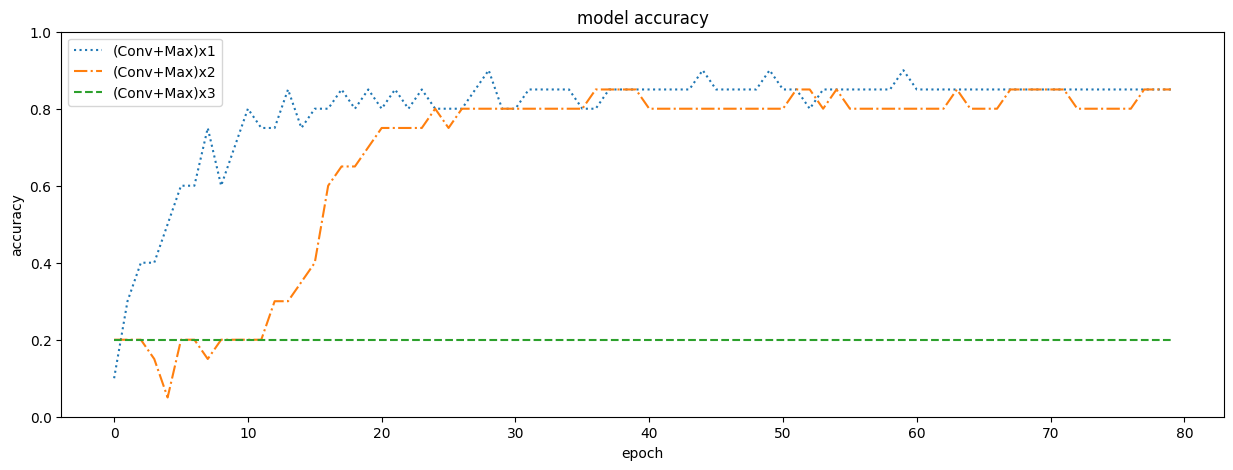

In [36]:
import matplotlib.pyplot as plt

# PLOT ACCURACIES
plt.figure(figsize=(15, 5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.show()


## Arsitektur Model Skenario 2

In [37]:
num_classes = len(class_names)
nets = 6
model = [0] * nets

for j in range(6):
    model[j] = Sequential()
    model[j].add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model[j].add(Conv2D(j*8+8, kernel_size=5, padding='same', activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    model[j].add(Dense(512, activation='relu'))
    model[j].add(Dense(num_classes))
    model[j].compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(
                         from_logits=True),
                     metrics=['accuracy'])


## Proses Training dengan Model Arsitektur Skenario 2

In [38]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps", "16 maps", "24 maps", "32 maps", "40 maps", "48 maps"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=32, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 8 maps: Epochs=20, Train accuracy=0.92500, Validation accuracy=0.90000
CNN 16 maps: Epochs=20, Train accuracy=0.96250, Validation accuracy=0.95000
CNN 24 maps: Epochs=20, Train accuracy=0.87500, Validation accuracy=0.85000
CNN 32 maps: Epochs=20, Train accuracy=0.91250, Validation accuracy=0.85000
CNN 40 maps: Epochs=20, Train accuracy=0.86250, Validation accuracy=0.80000
CNN 48 maps: Epochs=20, Train accuracy=0.85000, Validation accuracy=0.60000


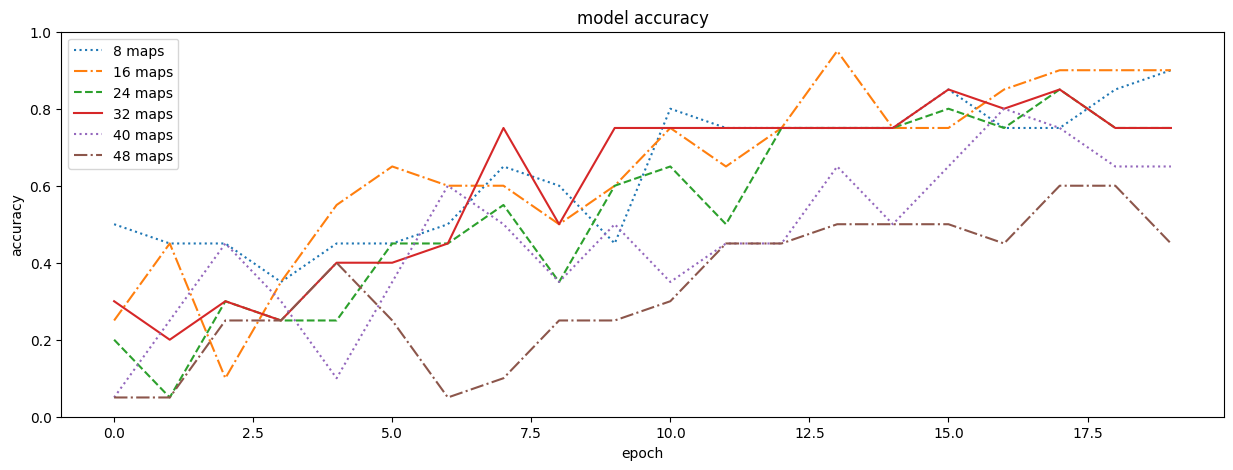

In [39]:
# PLOT ACCURACIES
plt.figure(figsize=(15, 5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.show()

## Arsitektur Model Skenario 3

In [40]:
num_classes = len(class_names)
nets = 8
model = [0] * nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(layers.Rescaling(
        1./255, input_shape=(img_height, img_width, 3)))
    model[j].add(Conv2D(40, kernel_size=5, padding='same', activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(512, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(num_classes))
    model[j].compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(
                         from_logits=True),
                     metrics=['accuracy'])

## Proses Training dengan Model Arsitektur Skenario 3

In [41]:
# CREATE VALIDATION SET
# X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=32, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN D=0: Epochs=20, Train accuracy=0.96250, Validation accuracy=0.90000
CNN D=0.1: Epochs=20, Train accuracy=0.83750, Validation accuracy=0.75000
CNN D=0.2: Epochs=20, Train accuracy=0.91250, Validation accuracy=0.80000
CNN D=0.3: Epochs=20, Train accuracy=0.85000, Validation accuracy=0.75000
CNN D=0.4: Epochs=20, Train accuracy=0.92500, Validation accuracy=0.75000
CNN D=0.5: Epochs=20, Train accuracy=0.83750, Validation accuracy=0.80000
CNN D=0.6: Epochs=20, Train accuracy=0.83750, Validation accuracy=0.80000
CNN D=0.7: Epochs=20, Train accuracy=0.73750, Validation accuracy=0.60000


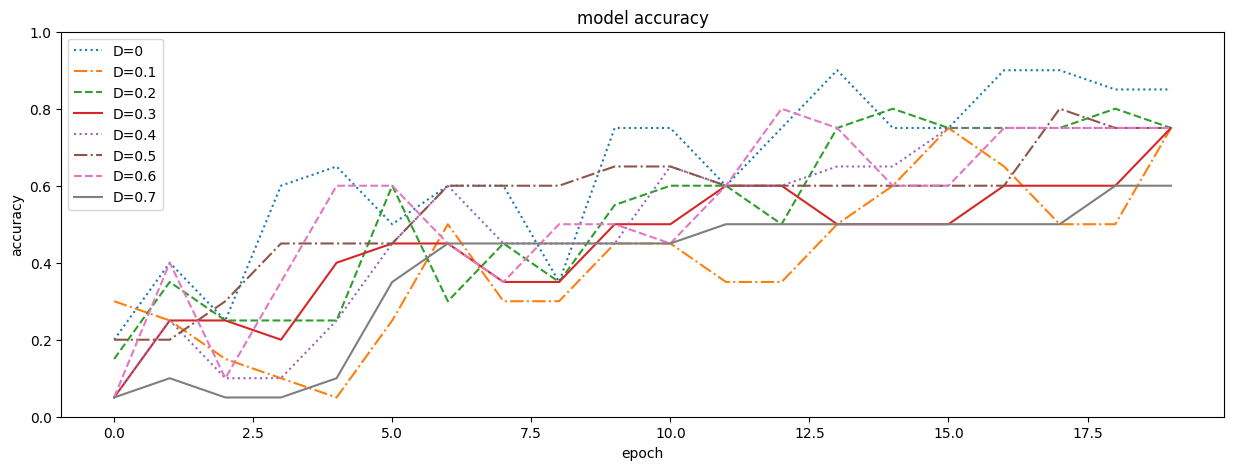

In [42]:
# PLOT ACCURACIES
plt.figure(figsize=(15, 5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.show()


32 berarti Batch size nya 256 ,256 merupakan nilai Height dan Width nya
3 adalah jumlah kanal nya (RGB)

Bisa kita lihat dr grafik diatas. Kita dapat simpulkan jika ketiganya memiliki akurasi diatas 85 % . Namun, yang terbaik yaitu (C-P)x2 karena memiliki akurasi tertinggi dan untuk alasan efisiensi kita pilih yang x2.

Oleh karena itu , kita memilih 2 Subsampling untuk arsitektur kita sebagai jumlah subsampling yg paling efisien untuk klasifikasi rempah rimpang

dilihat dari grafik diatas, maka dpt disimpulkan bahwa 64 feature map lah yang tertinggi namun pada epoch 17,5 bernilai sama dengan feature map 32. oleh karena itu, untuk alasan efisiensi, yang digunakan dalam arsitektur cnn kita adalah 32 feature map.  karena fm32 mendapat nilai yang cukup tinggi senilai 0.8825 pada epoch 20 hampir sama dengan fm48 yang bernilai sama dan fm64 yang memiliki selisih 0.03.

Summary from thats graphs is Dropout with x0% was the most eficients because from epoch 1 to 15 had significant higher eficients from others rate . althougt from dropout 20% lacking a bit when epoch above 20. but overall Dropout with 30% was the winner of this experiment.

Kesimpulan akhir

Training CNN memiliki keragaman parameter dan nilai biasnya pada masing-masing layer sehingga bisa diartikan jika CNN merupakan proses yang acak. Acak dari segi nilai hyperparameter ataupun nilai keluaran setiap arsitekturnya selalu berbeda. Inilah yang membuat eksperimen seperti ini susah untuk dilakukan karena setiap kita meng run arsitektur kita dengan parameter yang sama seperti sebelumnya, hasilnya bisa saja beda setiap waktunya. Olehkarena itu, kita harus selalu mencoba puluhan bahkan sampai ratusan eksperimen untuk menarik sebuah rata-rata dari setiap training model.  ketiga eksperimen pun sudah saya run 1 bulanan dengan nilai epoch , batch size, subsampling, optimizers, dan feature map yang berbeda beda dengan layer arsitektur yang berbeda beda pula sehingga bisa saya simpulkan penelitian ini sudah menarik nilai rata-rata dari setiap modelnya. Untuk arsitektur yang paling optimal sendiri sesuai dengan apa yang ketiga eksperimen saya sudah lakukan sebelumnya untuk mengklasifikasi rempah rimpang dengan menggunakan convolutional neural network adalah dengan kombinasi 2 subsampling dengan dua layer konvolusi dengan feature map bernilai 32 dan 64 di kedua subsampling dan nilai dropout sebesar 30%. Dengan begitu jika kita rakit ulang menjadi sbuah arsitektur CNN, maka model tersebut akan mendapat nilai akurasi sebesar 97%.